In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
from sklearn.metrics import mean_squared_error
%matplotlib inline
# %matplotlib qt

30


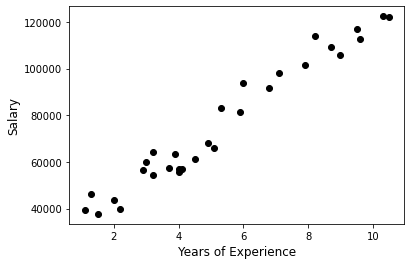

In [2]:
dataset = pd.read_csv('Dataset/Salary_Data.csv')
x = dataset.iloc[:, 0].values #Feature matrix
y = dataset.iloc[:, 1].values #Label Matrix 
plt.scatter(x,y,color='black')
plt.xlabel("Years of Experience", fontsize=12);
plt.ylabel("Salary", rotation=90, fontsize=12);
print(len(x))

# Minimos cuadrados
## Solución analítica univariable
modelo
$\Large{y=mx+b}$

función de error
$ \varepsilon (m,b)=\sum_{i=1}^{N} (y-mx-b)^2 $

$\Large{m= \frac{N \sum_{i=1}^{N} {x_iy_i}- \sum_{i=1}^{N}{y_i} \sum_{i=1}^{N}{x_i}}{N \sum_{i=1}^{N}{x_i^2} - (\sum_{i=1}^{N}{x_i})^2}}$

$\Large{b=   \frac{\sum_{i=1}^{N}{y_i} \sum_{i=1}^{N}{x_i^2}- \sum_{i=1}^{N} {x_iy_i}\sum_{i=1}^{N}{x_i}} {N \sum_{i=1}^{N}{x_i^2}-(\sum_{i=1}^{N}{x_i})^2  }}$


30
8000 25792.20019866868
RMS = 10343.696534


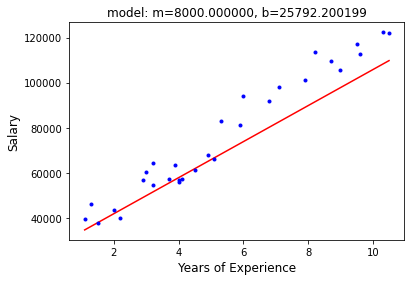

In [3]:
#parameter estimation
N=len(x)
print(len(x))
sumxy=np.sum(x*y)
sumy=np.sum(y)
sumx=np.sum(x)
sumx2=sumx**2
sumxx=np.sum(x**2)
m= (N*sumxy - sumy*sumx)/(N*sumxx- sumx2)
b=(sumy*sumxx-sumxy*sumx)/(N*sumxx- sumx2)


#plot 
m=8000
x_p=np.array([np.min(x),np.max(x)])
y_p=m*x_p+b
plt.plot(x_p,y_p,'r-')
plt.plot(x,y,'b.')
plt.xlabel("Years of Experience", fontsize=12);
plt.ylabel("Salary", rotation=90, fontsize=12);
plt.title('model: m=%f,'  %m +' b=%f'  %b)
print(m,b)
#RMS
rms = mean_squared_error(y,m*x+b , squared=False)
print("RMS = %f" %rms)

## Función objetivo por gradiente descendente clásico


- Ejemplo de hipótesis: regresión lineal 
\begin{equation*}
y=h(\mathbf{x} \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0+\theta_1x_1+\cdots + \theta_n x_n
\end{equation*}


- Convención para simplificar notación: $x_0={1}$
\begin{equation*}
y=h(\mathbf{x}; \boldsymbol{\theta})= h_{\boldsymbol{\theta}}(\mathbf{x})= \theta_0x_0+\theta_1x_1+\cdots + \theta_n x_n=\sum_{i=0}^{n}{\theta_{i}x_{i}}
\end{equation*} 
\begin{equation*}
=\boldsymbol{\theta}^T  \mathbf{x}= \langle \boldsymbol{\theta},  \mathbf{x} \rangle= \boldsymbol{\theta} \cdot{}  \mathbf{x}
\end{equation*}
\begin{equation*}
\boldsymbol{\theta} = [\theta_{0},\theta_{1}, \ldots ,\theta_{n}]^T
\end{equation*}  
\begin{equation*}
\boldsymbol{x} = [x_{0},x_{1}, \ldots ,x_{n}]^T
\end{equation*}  


- Para encontrar $\boldsymbol{\theta}$ minimizamos la función de error $J(\boldsymbol{\theta})$ con 
\begin{equation*}
J(\boldsymbol{\theta}) = \frac{1}{2} \sum_{i=1}^{m} ( h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})- y^{(i)} )^2
\end{equation*}

\begin{equation*}
 \boldsymbol{\theta}^{*}= \arg\min_{\boldsymbol{\theta}} \boldsymbol{\theta}
\end{equation*}
Objetivo:
Se buscan parámetros $\boldsymbol{\theta}$ que producen el menor valor de $\boldsymbol{\theta}$

- Para el caso de dos parametros una caraterística
\begin{equation*}
J(\theta_0,\theta_1) = \frac{1}{2}  \sum_{i=1}^{m}  ( \theta_0+\theta_1 x_{1}^{(i)} - y^{(i)} )^2
\end{equation*}  

### Algoritmo de gradiente descendente  

1.- Tome un valor $\boldsymbol{\theta}^{(0)}$ inicial, t=0

2.- Calcule en   $\boldsymbol{\theta}^{(t)}$ el gradiente (máxima dirección de cambio)
\begin{equation*}
\nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})= \left[ \frac{\partial J}{\partial \theta_{0}}  \frac{\partial J}{\partial \theta_{1}}  \cdots \frac{\partial J}{\partial \theta_{0}} \right]^{T} 
\end{equation*}
3.- Calcule la nueva posición 
\begin{equation*}
{\boldsymbol{\theta}}^{(t+1)}:= {\boldsymbol{\theta}}^{(t)}- \alpha \nabla_{\boldsymbol{\theta}}  J(\boldsymbol{\theta}^{(t)})
\end{equation*}
o de forma equivalente para cada $\theta_{j}, j\in 1, \ldots ,n$
\begin{equation*}
\theta_{j}^{(t+1)}:=\theta_{j}^{(t)}- \alpha \frac{\partial J({\boldsymbol{\theta}}^{(t)})}{\partial \theta_j}
\end{equation*}



### Gradiente de la función de costo
La función de costo multivariable esta dada por 
 \begin{equation*}
 J(\theta_0,\theta_1, \theta_2, \ldots)= \frac{1}{2} \sum_{i=1}^{m}(\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)})^2
\end{equation*}
el gradiente se obtiene fácilmente

   \begin{align}
    \nabla_\theta J(\boldsymbol{\theta}) &= \begin{bmatrix}
            \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_0} \\
           \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_1} \\
           \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_2} \\
           \vdots  \\
           \frac{\partial J({\boldsymbol{\theta}})}{\partial \theta_n}
         \end{bmatrix}
  \end{align}
  
  
 \begin{align}
    \nabla_\theta J(\boldsymbol{\theta}) &= \begin{bmatrix}
            \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot 1 \\
           \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot x_1^{(i)}\\
           \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot x_2^{(i)}\\
           \vdots  \\
           \sum_{i=1}^{m} (\theta_0+\theta_1 x_1^{(i)}+ \theta_2 x_2^{(i)}+ \ldots + \theta_n x_n^{(i)}-y^{(i)}) \cdot x_n^{(i)}
         \end{bmatrix}
  \end{align}

gradiente en notación vectorial

 \begin{equation*}
\nabla_\theta J(\boldsymbol{\theta}) = \sum_{i=1}^{m}(\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}-y^{(i)}) \cdot \boldsymbol{x}^{(i)}
\end{equation*}


### Algoritmo de gradiente descendente
$\boldsymbol{\theta_{j+1}}=\theta_{j}-\alpha \nabla \boldsymbol{J} (\boldsymbol{\theta_{j}})$

C:\Users\coyul\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\coyul\AppData\Local\Temp/ipykernel_34352/811707831.py:20: RuntimeWarning: overflow encountered in square
  J.append(np.sum(r**2))
C:\Users\coyul\AppData\Local\Temp/ipykernel_34352/811707831.py:19: RuntimeWarning: overflow encountered in multiply
  theta = theta -lr*si


Iterations: 999


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

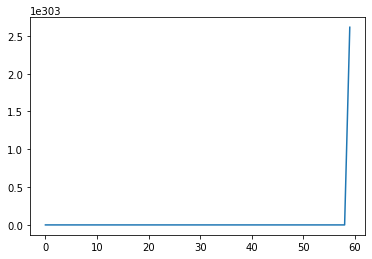

In [ ]:
theta = np.array([[0],[0]])
ep=1e-4
lr =10
n_iter = 1000
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x),1)),x]
J=[]
x_bs=x_b*1
for it in range(1,x_bs.shape[1]):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std
    
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_bs,theta)
    r=(pred - y)
    si=(x_bs.T.dot(r))
    theta = theta -lr*si
    J.append(np.sum(r**2))
    if LA.norm(si)<ep:
        break
plt.plot(J)
print("Iterations: %d" %it)
# print("analytic: b=%f, m=%f,  \nDG: b=%f m=%f," %(b,m,theta[0],theta[1]))
# rms = mean_squared_error(y,m*x+b , squared=False)
# print("RMS_analytic = %f" %rms)
rms = mean_squared_error(y,theta[1]*x+theta[0] , squared=False)
print("RMS_gradient = %f" %rms)

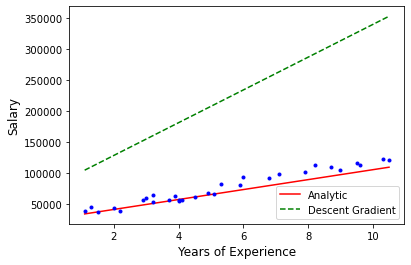

In [9]:
#plot 
x_p=np.array([np.min(x),np.max(x)])
y_g=theta[1]*x_p+theta[0]
plt.plot(x_p,y_p,'r-')
plt.plot(x_p,y_g,'g--')
plt.plot(x,y,'b.')
plt.xlabel("Years of Experience", fontsize=12);
plt.ylabel("Salary", rotation=90, fontsize=12);
plt.legend(["Analytic", "Descent Gradient"], loc ="lower right")

In [ ]:

#analytic: b=25792.200199, m=9449.962321,  

B = np.arange(0, 40000, 50)
Blen = len(B)
M = np.arange(0, 15000, 25)
Mlen = len(M)
print(Blen,Mlen)
pred=np.zeros([Blen,Mlen])


for i in range(Blen):
    for j in range(Mlen):
        temp=np.array([[B[i]],[M[j]]])
        temp=np.dot(x_b,temp)
        temp=np.sum((temp - y)**2)
        pred[i,j]=temp
#         temp=(x_b.T.dot((temp - y)))
#         pred[i,j]=LA.norm(temp)

print(np.min(B))
B, M = np.meshgrid(M, B)
print(pred.shape, B.shape)       
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(B, M, pred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()
pred_t=pred

In [ ]:
%matplotlib widget
fig, ax = plt.subplots()
plt.contour(B, M, pred_t, 150, cmap='RdGy');
plt.xlabel("Slope", fontsize=12);
plt.ylabel("Intercept", rotation=90, fontsize=12);
plt.plot(9449.962321, 25792.200199 , 'ro')

theta_pre = np.array([[0],[0]])
theta_new = theta_pre
ep=1e-3
lr =0.0001
n_iter = 1000
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x),1)),x]
plt.plot(theta_pre[0], theta_pre[1], 'go')
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_b,theta_pre)
    si=-lr*(x_b.T.dot((pred - y)))
    theta_new = theta_pre + si;
    xt=np.array([theta_pre[1],theta_new[1]])
    yt=np.array([theta_pre[0],theta_new[0]])
    plt.plot(theta_new[1], theta_new[0], 'go')
    plt.plot(xt,yt,'g-')
    theta_pre=theta_new
#     print(theta_pre)
    if LA.norm(si)<ep:
        break;
plt.show()
print(theta_pre)

### Ejemplo bidimensional del Algoritmo de gradiente descendente  

In [ ]:
%matplotlib widget
dataset = pd.read_csv('auto-mpg.csv')
print(dataset)
# dataset= dataset.drop(labels=8, axis=0)
vary=0
var1=4
var2=5

x1 = dataset.iloc[:, var1].values #Feature matrix
x2 = dataset.iloc[:, var2].values #Criterion Matrix 
y = dataset.iloc[:, vary].values #Criterion Matrix 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x1,x2,y)
plt.title("Data  3D ")


ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);

In [ ]:
theta = np.array([[-10],[-10],[-10]])
ep=1e-4
lr =0.001
n_iter = 500
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x1),1)),x1,x2]
#Standardization using z-score
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std

for it in range(n_iter):
    #Gradient
    pred = np.dot(x_bs,theta)
    si=-lr*(x_bs.T.dot((pred - y)))
    theta = theta + si
    
    if LA.norm(si)<ep:
        break;
print(theta[0],theta[1],theta[2])        
#[23.51457281] [-6.20451092] [0.69061318]

In [ ]:
x1 = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.02)
x2 = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.02)
plane=np.zeros([len(x1),len(x2)])

for i in range(len(x1)):
    for j in range(len(x2)):
        plane[i,j]=np.dot(np.c_[1,x1[i],x2[j]],theta)
X1, X2 = np.meshgrid(x1, x2, indexing = 'ij')
print(X1.shape)
print(X2.shape)
print(plane.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1,X2, plane,
                       linewidth=0, antialiased=False,alpha=0.2)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);




## Solución cerrrada

In [ ]:
theta_best = np.linalg.inv(x_bs.T.dot(x_bs)).dot(x_bs.T).dot(y)
print(theta_best)